In [12]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import numpy as np
from glob import glob

In [13]:
#find most massive star
# load up all snapshots
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}
#datadir = '../data/'
#paths = glob('../data/' + '/*.hdf5')
ds= yt.load("../data/snapshot_296.hdf5", unit_base=unit_base)
ds

yt : [INFO     ] 2024-03-17 09:52:17,715 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-03-17 09:52:17,742 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-03-17 09:52:17,743 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-03-17 09:52:17,744 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-17 09:52:17,745 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-03-17 09:52:17,745 Parameters: cosmological_simulation   = 0


GizmoDataset: /Users/alexanderescamilla/research/data/snapshot_296.hdf5

In [18]:
def LocateStar(data):
    ad = data.all_data()
    MassStar = ad["PartType5", "Masses"].in_units('Msun')
    ParticleID = ad['PartType5', 'ParticleIDs']
    Coordinates = ad['PartType5', 'Coordinates'].in_units('pc')
    sort = np.argmax(MassStar)
    Center = Coordinates[sort]
    return Center

CenterCordinates = LocateStar(ds)

CenterCordinates


unyt_array([4.09887739, 3.9753618 , 4.11322279], 'pc')

yt : [INFO     ] 2024-03-17 10:31:08,643 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-03-17 10:31:08,661 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-03-17 10:31:08,662 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-03-17 10:31:08,662 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-17 10:31:08,662 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-03-17 10:31:08,662 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-03-17 10:31:08,710 Allocating for 1.084e+07 particles
Loading particle index: 100%|█████████████████| 42/42 [00:00<00:00, 3029.42it/s]
yt : [INFO     ] 2024-03-17 10:31:09,354 xlim = -0.104638 8.055362
yt : [INFO     ] 2024-03-17 10:31:09,355 ylim = 0.033223 8.193223
yt : [INFO     ] 2024-03-17 10:31:09,356 xlim = -0.104638 8.055362
yt : [INFO     ] 2024-03-17 10:31:09,3

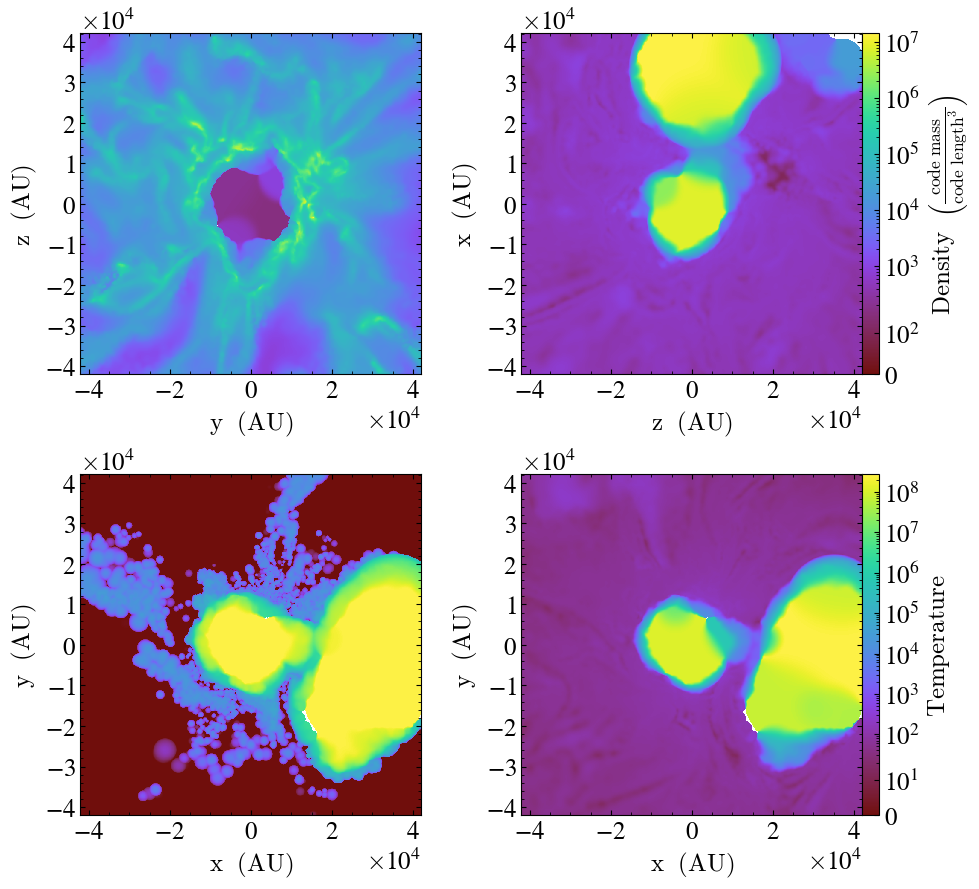

yt : [INFO     ] 2024-03-17 09:56:36,227 xlim = 3.598877 4.598877
yt : [INFO     ] 2024-03-17 09:56:36,229 ylim = 3.475362 4.475362
yt : [INFO     ] 2024-03-17 09:56:36,230 xlim = 3.598877 4.598877
yt : [INFO     ] 2024-03-17 09:56:36,231 ylim = 3.475362 4.475362
yt : [INFO     ] 2024-03-17 09:56:36,233 Making a fixed resolution buffer of (('PartType0', 'HII')) 800 by 800
yt : [INFO     ] 2024-03-17 09:56:38,339 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800



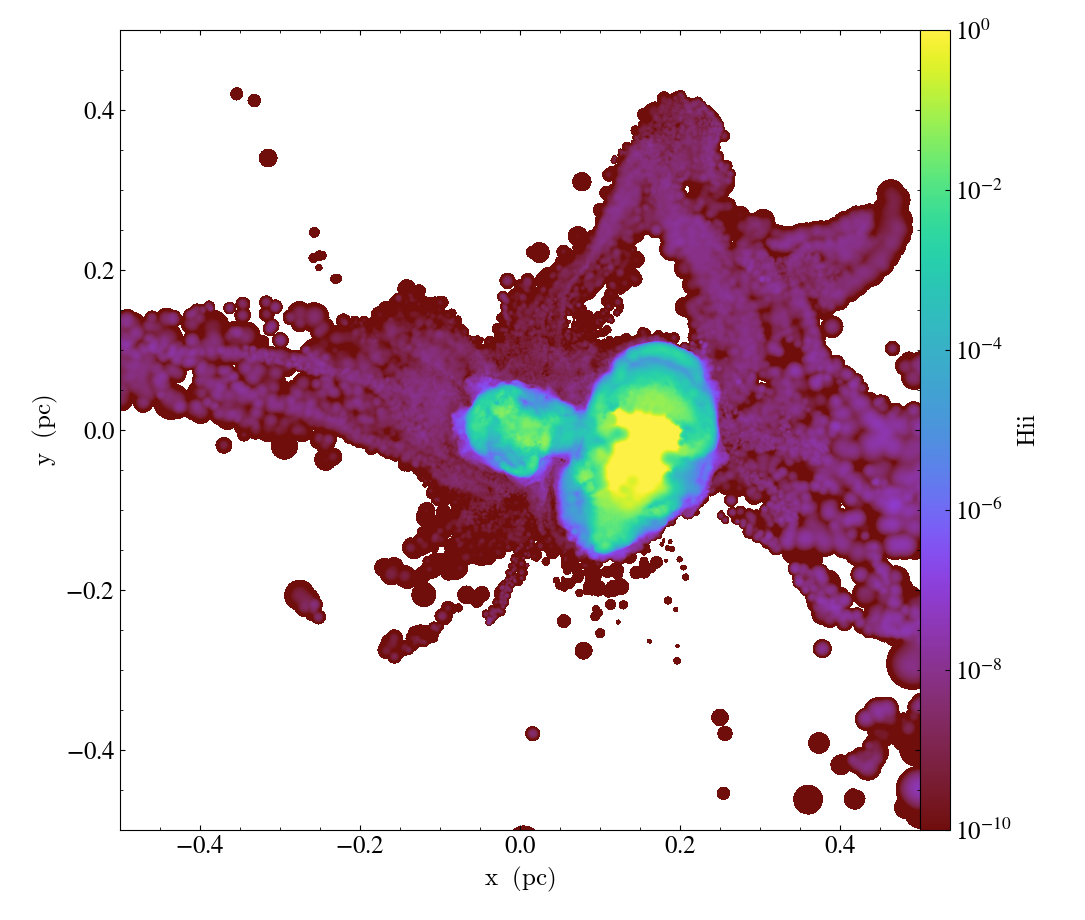

In [24]:
def ThinProjPlot(data, CenterCords, vmin , vmax, limfield, field):
    dwidth = (1,'pc')
    dir = 2
    fields = field
    weight  = [("PartType0", "Density")]
    left_corner = data.domain_left_edge.copy()
    right_corner = data.domain_right_edge.copy()
    depth = data.quan(.1, "pc")
    left_corner[dir] = CenterCords[dir] - 0.5 * depth
    right_corner[dir] = CenterCords[dir] + 0.5 * depth
    region = data.box(left_corner, right_corner)
    proj = yt.ProjectionPlot(data,  'z',  center=CenterCords , fields=fields, width = dwidth, data_source= region, weight_field = weight)
    proj.set_zlim(limfield, vmin, vmax)
    proj.show()


ThinProjPlot(ds, CenterCordinates, 1e-10, 1, ('PartType0', 'HII'),('PartType0', 'HII'))

yt : [INFO     ] 2024-03-17 09:56:45,625 xlim = 3.598877 4.598877
yt : [INFO     ] 2024-03-17 09:56:45,627 ylim = 3.475362 4.475362
yt : [INFO     ] 2024-03-17 09:56:45,629 xlim = 3.598877 4.598877
yt : [INFO     ] 2024-03-17 09:56:45,630 ylim = 3.475362 4.475362
yt : [INFO     ] 2024-03-17 09:56:45,631 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2024-03-17 09:56:47,672 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800



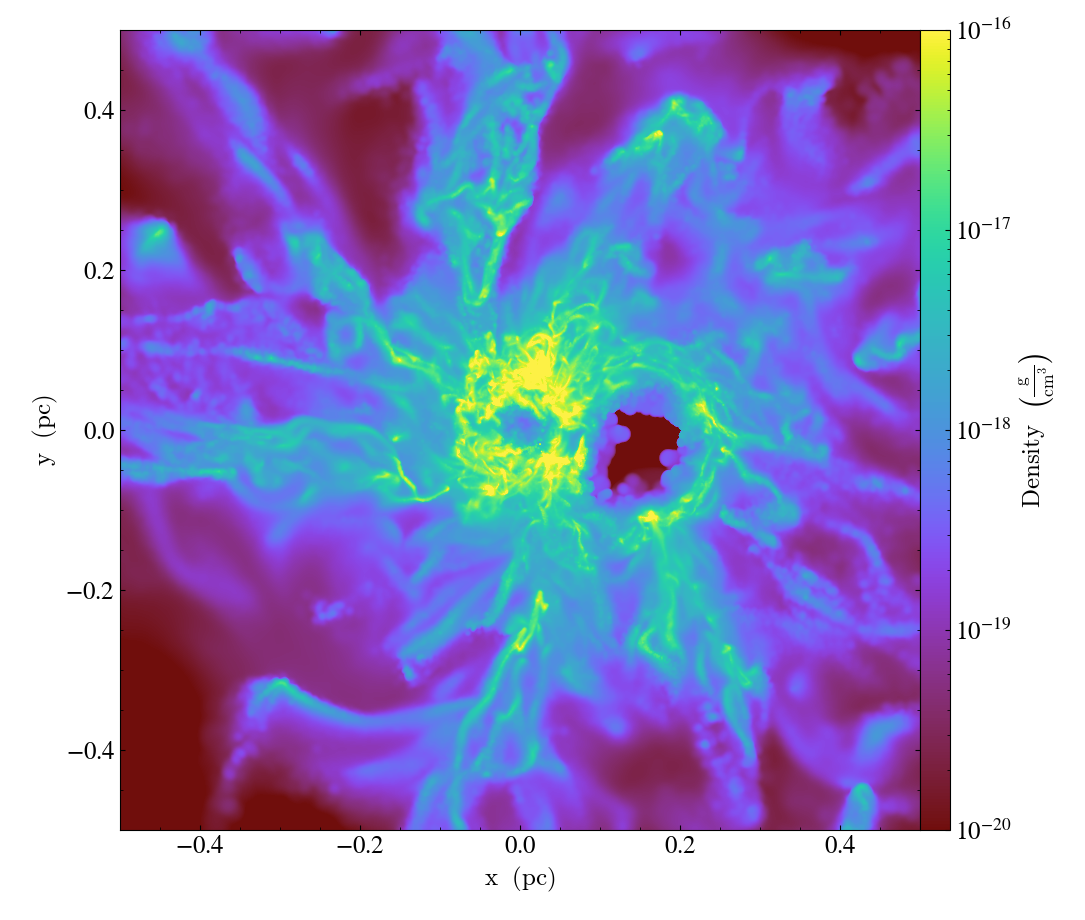

In [25]:
ThinProjPlot(ds, CenterCordinates, 1e-20, 1e-16, ('gas', 'density'), ('gas', 'density'))

yt : [INFO     ] 2024-03-08 12:36:51,928 xlim = 3.098877 5.098877
yt : [INFO     ] 2024-03-08 12:36:51,929 ylim = 2.975362 4.975362
yt : [INFO     ] 2024-03-08 12:36:51,931 xlim = 3.098877 5.098877
yt : [INFO     ] 2024-03-08 12:36:51,932 ylim = 2.975362 4.975362
yt : [INFO     ] 2024-03-08 12:36:51,933 Making a fixed resolution buffer of (('PartType0', 'H_nuclei_density')) 800 by 800
yt : [INFO     ] 2024-03-08 12:36:54,074 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800



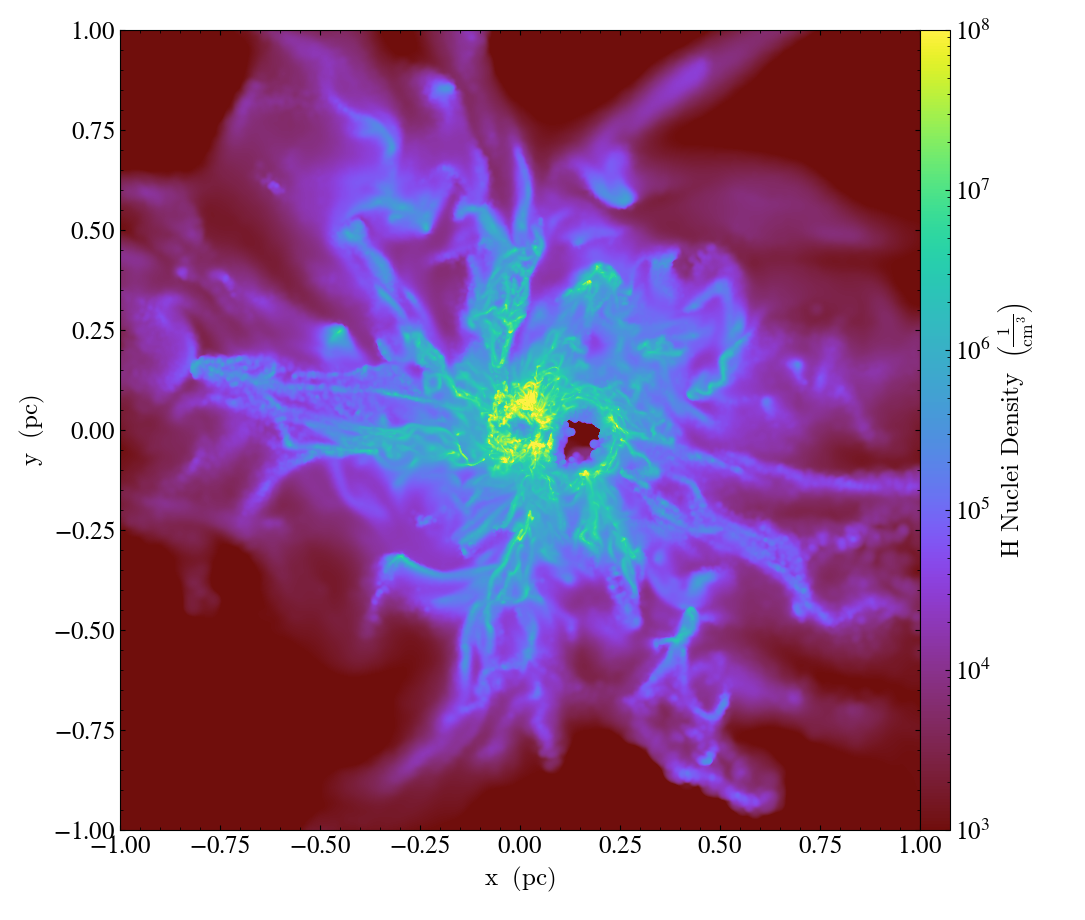

In [147]:
ThinProjPlot(ds, CenterCordinates, 1e3, 1e8, ('PartType0', 'H_nuclei_density'), ('PartType0', 'H_nuclei_density'))